<a href="https://colab.research.google.com/github/JackMyles/CS156a-LearningFromData/blob/main/cs156a_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 156a HW 6

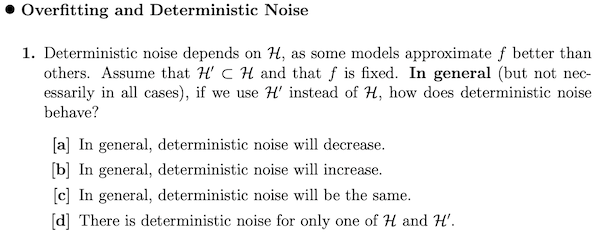

#### Answer:
B

In general, deterministic noise will increase because the smaller the hypothesis set, the more difficulty it will have approximating the function (slide 10 of lecture 11 has a good example illustrating this). If $h^*$ is a hypothesis from set $H$, deterministic noise can be described as the part of $f$ that $h$ can't capture ($f(x) - h^*(x)$ from slide 16 of lecture 11). If we only consider a subset of $H$, it will be more difficult to approximate $f$ since the hypothesis will be less accurate, thus resulting in an increase in deterministic noise.

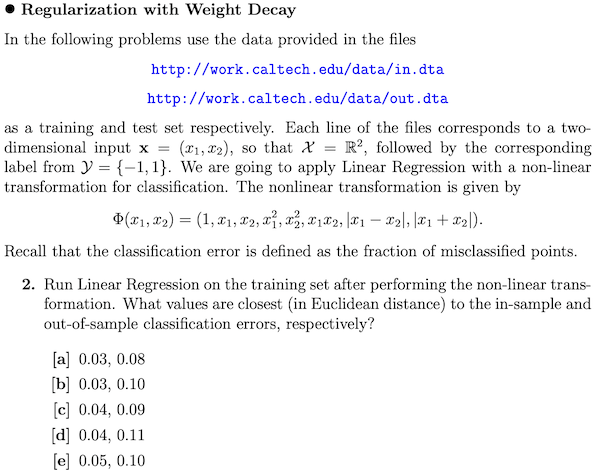

#### Answer:
A

In [40]:
import pandas as pd
import numpy as np

train = pd.read_csv('in.dta.txt', names=["x1", "x2", "y"], sep='\s+')
test = pd.read_csv('out.dta.txt', names=["x1", "x2", "y"], sep='\s+')

x1_train = np.array(train['x1'])
x2_train = np.array(train['x2'])
y_train = np.array(train['y'])
N_train = train.shape[0]

x1_test = np.array(test['x1'])
x2_test = np.array(test['x2'])
y_test = np.array(test['y'])
N_test = test.shape[0]

def get_Z(x1, x2, N):
    return np.array([np.ones(N), x1, x2, x1 * x1, x2 * x2, x1 * x2, np.abs(x1 - x2), np.abs(x1 + x2)]).T

Z_train = get_Z(x1_train, x2_train, N_train)
Z_test = get_Z(x1_test, x2_test, N_test)

Z_dagger = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train)), Z_train.T)
w = np.dot(Z_dagger, y_train)

E_IN = sum(y_train != np.sign(np.dot(Z_train, w))) / N_train
E_OUT = sum(y_test != np.sign(np.dot(Z_test, w))) / N_test

print(f"E_IN is", "%.2f" % E_IN)
print(f"E_OUT is", "%.2f" % E_OUT)

E_IN is 0.03
E_OUT is 0.08


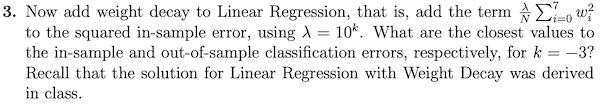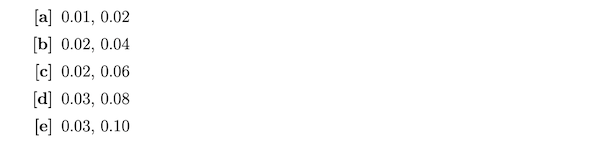

#### Answer:
D

In [41]:
k = -3
l = 10 ** k

Z_dagger_reg = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train) + l * np.identity(w.size)), Z_train.T)
w_reg = np.dot(Z_dagger_reg, y_train)

E_IN_REG = sum(y_train != np.sign(np.dot(Z_train, w_reg))) / N_train
E_OUT_REG = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test

print(f"E_IN_REG is", "%.2f" % E_IN_REG)
print(f"E_OUT_REG is", "%.2f" % E_OUT_REG)

E_IN_REG is 0.03
E_OUT_REG is 0.08


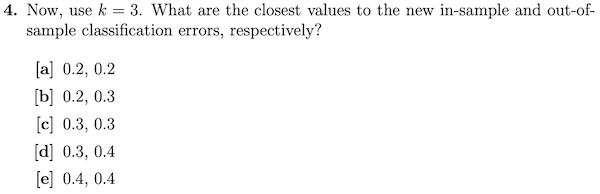

#### Answer:
E

In [42]:
k = 3
l = 10 ** k

Z_dagger_reg = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train) + l * np.identity(w.size)), Z_train.T)
w_reg = np.dot(Z_dagger_reg, y_train)

E_IN_REG = sum(y_train != np.sign(np.dot(Z_train, w_reg))) / N_train
E_OUT_REG = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test

print(f"E_IN_REG is", "%.1f" % E_IN_REG)
print(f"E_OUT_REG is", "%.1f" % E_OUT_REG)

E_IN_REG is 0.4
E_OUT_REG is 0.4


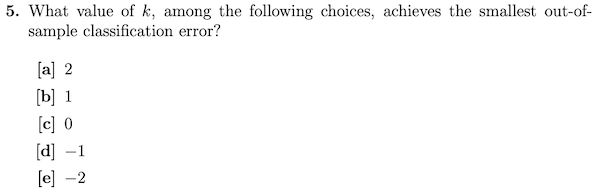

#### Answer:
D

In [43]:
def print_e_out(k):
    l = 10 ** k

    Z_dagger_reg = np.dot(np.linalg.inv(np.dot(Z_train.T, Z_train) + l * np.identity(w.size)), Z_train.T)
    w_reg = np.dot(Z_dagger_reg, y_train)

    E_OUT_REG = sum(y_test != np.sign(np.dot(Z_test, w_reg))) / N_test

    print(f"E_OUT_REG for k={k} is", "%.3f" % E_OUT_REG)

for i in range(-2, 3):
    print_e_out(i)

E_OUT_REG for k=-2 is 0.084
E_OUT_REG for k=-1 is 0.056
E_OUT_REG for k=0 is 0.092
E_OUT_REG for k=1 is 0.124
E_OUT_REG for k=2 is 0.228


k=-1 is has the smallest out-of-sample classification error

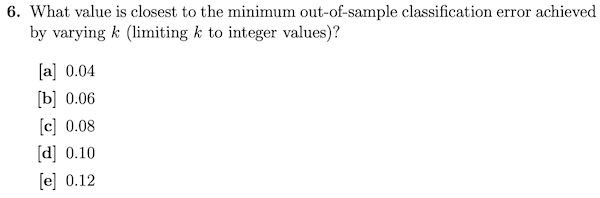

#### Answer:
B

In [44]:
for i in range(-10, 11):
    print_e_out(i)

E_OUT_REG for k=-10 is 0.084
E_OUT_REG for k=-9 is 0.084
E_OUT_REG for k=-8 is 0.084
E_OUT_REG for k=-7 is 0.084
E_OUT_REG for k=-6 is 0.084
E_OUT_REG for k=-5 is 0.084
E_OUT_REG for k=-4 is 0.084
E_OUT_REG for k=-3 is 0.080
E_OUT_REG for k=-2 is 0.084
E_OUT_REG for k=-1 is 0.056
E_OUT_REG for k=0 is 0.092
E_OUT_REG for k=1 is 0.124
E_OUT_REG for k=2 is 0.228
E_OUT_REG for k=3 is 0.436
E_OUT_REG for k=4 is 0.452
E_OUT_REG for k=5 is 0.456
E_OUT_REG for k=6 is 0.456
E_OUT_REG for k=7 is 0.456
E_OUT_REG for k=8 is 0.456
E_OUT_REG for k=9 is 0.456
E_OUT_REG for k=10 is 0.456


k < -3 is under-regularizing and k > 4 is over-regularizing. k = -1 still has the minimum out-of-sample classification error, which is 0.056 ~ 0.06.

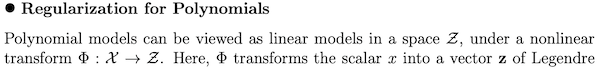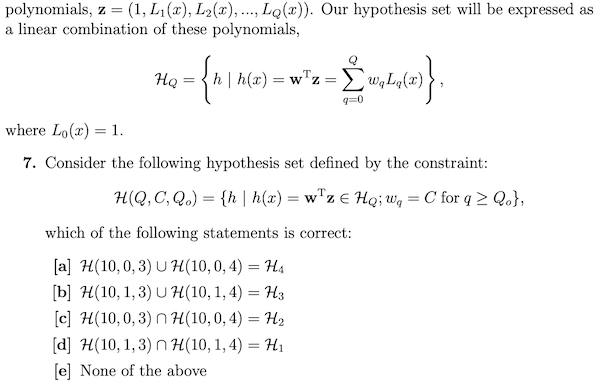

#### Answer:
C

$H(Q,C,Q_o)$ sets all coeffeicients $w_q$ with $q \geq Q_o$ to $C$.

[a] Incorrect, because the expression should be a third order polynomial.

[b] Incorrect, because the union of the two should be $H_{10}$ since it is essentially unconstrained.

[c] Correct, because the first expression consists of all second order polynomials and the second expression consists of all third order polynomials. The intersection of these would be second order polynomials.

[d] Incorrect, same reason as [b]

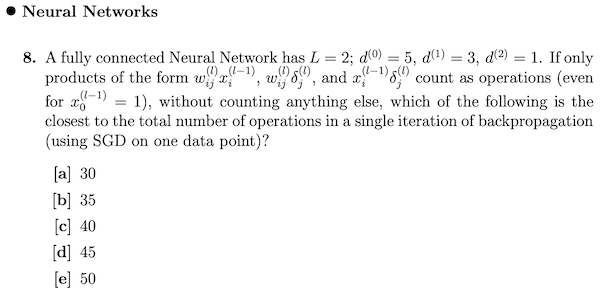

#### Answer:
D

Using the information in lecture 10 on the nature of Neural Networks and the backpropagation algorithm we can visualize our network and count the total number of operations.

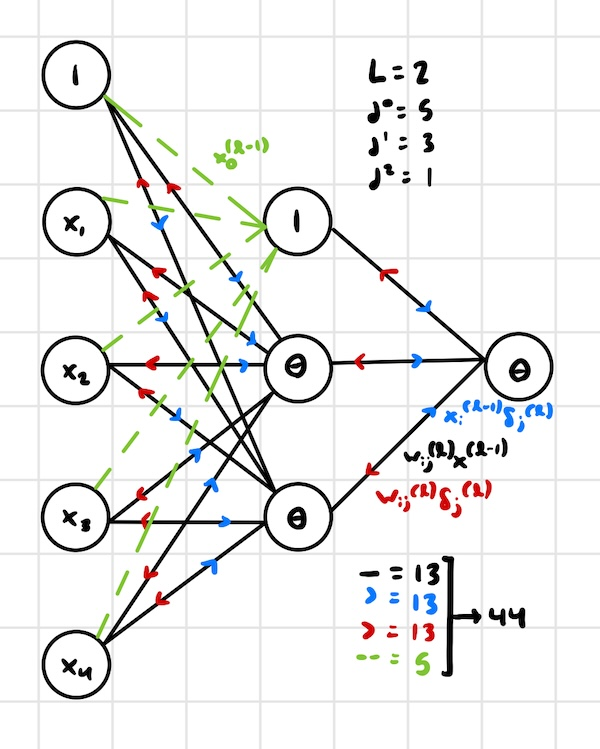

~ 45 operations

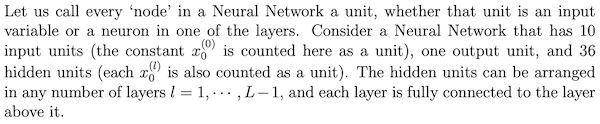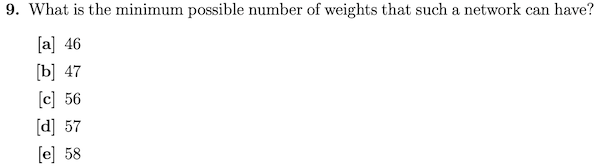

#### Answer:
A

The network structure that would minimize the number of weight edges is 18 hidden layers, each consisting of a regular node and a bias node.

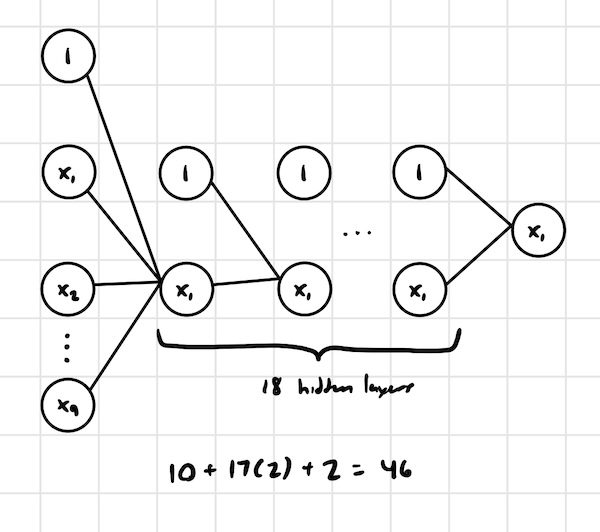

In [45]:
def get_num_edges(network):
    total_edges = 0
    for i in range(len(network) - 1):
        total_edges += (network[i]) * (network[i+1] - 1)
    total_edges += (network[-1])
    return total_edges

network = [10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
print(f"# of weight edges = {get_num_edges(network)}")

# of weight edges = 46


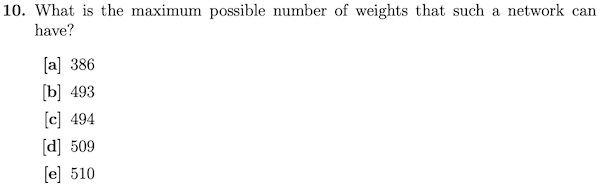

#### Answer:
E

In [46]:
N = 36
MIN_NODES = 2
d_input = 10
edges = []

def find_max_edges(n, i, arr):
    if n == 0:
        network = [d_input] + arr.copy()[:i]
        edges.append(get_num_edges(network))
    elif n > 0:
        for k in range(MIN_NODES, N + 1):
            arr[i] = k
            find_max_edges(n - k, i + 1, arr)

find_max_edges(N, 0, [0] * N)

print(f"Maximum # of weight edges = {max(edges)}")

Maximum # of weight edges = 510
